In [4]:
import pandas as pd
Names= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']


url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names=Names)

print(data.head(5))
print(data.info())

      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-nu

/tmp/ipython-input-3698568887.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=Names)


In [3]:
summary = data.describe()
summary = summary.transpose()
print(summary)

         count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
black    506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506

In [5]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(data))
DataScaled = scaler.fit_transform(data)
DataScaled = pd.DataFrame(DataScaled, columns=Names)

summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler()
         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    5

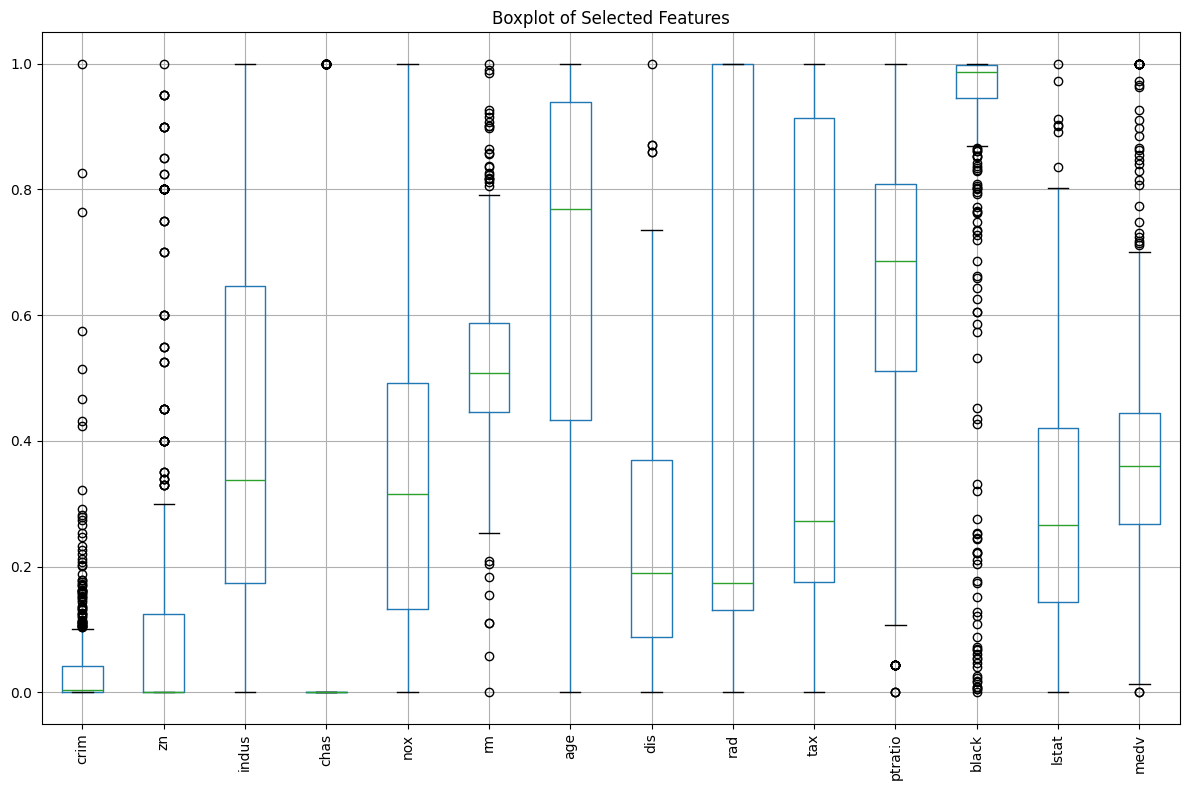

In [15]:
import matplotlib.pyplot as plt

# Set the figure size BEFORE plotting
plt.figure(figsize=(12, 8))  # (width, height) in inches

# Draw the boxplot for selected columns
boxplot = DataScaled.boxplot(column=Names)

# Show the plot
plt.title("Boxplot of Selected Features")
plt.xticks(rotation=90)  # Optional: rotate x-axis labels if they overlap
plt.tight_layout()
plt.show()

In [10]:
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

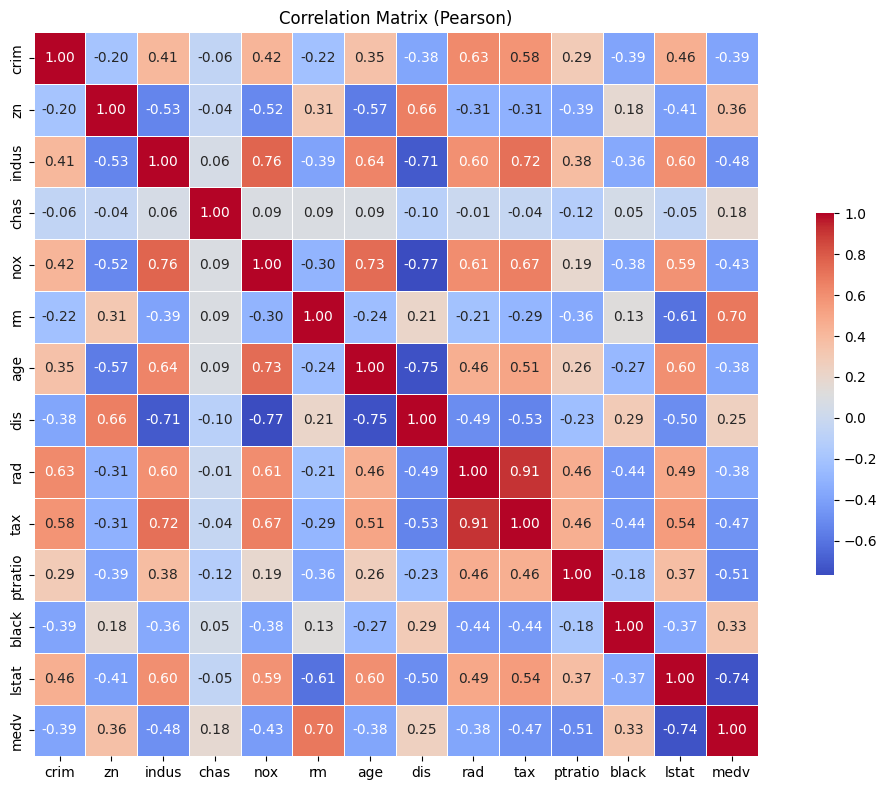

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
CorData = DataScaled.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(CorData, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.title("Correlation Matrix (Pearson)")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

X = DataScaled.drop('medv', axis = 1)
print('X shape = ',X.shape)
Y = DataScaled['medv']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)

X shape =  (506, 13)
Y shape =  (506,)
X train shape =  (404, 13)
X test shape =  (102, 13)
Y train shape =  (404,)
Y test shape =  (102,)


In [18]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

#first input and first hidden layer
model = Sequential()
model.add(Dense(20,input_dim=13, activation='relu'))

#second hidden layer
model.add(Dense(10, activation='relu'))

#output layer
model.add(Dense(1, activation='linear'))

#compile ANN
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#fit and display the summary
model.fit(X_train,Y_train, epochs=1000, verbose=1)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0057 - loss: 0.1342       
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0067 - loss: 0.0594     
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0153 - loss: 0.0552 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0093 - loss: 0.0459     
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0074 - loss: 0.0384     
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0070 - loss: 0.0371     
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0081 - loss: 0.0416     
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0052 - loss: 0.0362     
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0107 - loss: 0.0321     
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0143 - loss: 0.0289 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0105 - loss: 0.0259     
Epo

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)

In [21]:
#Testing the test dataset
Y_predKM =  model.predict(X_test)
score = model.evaluate(X_test,Y_test, verbose=0)
print(score[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.006384178064763546


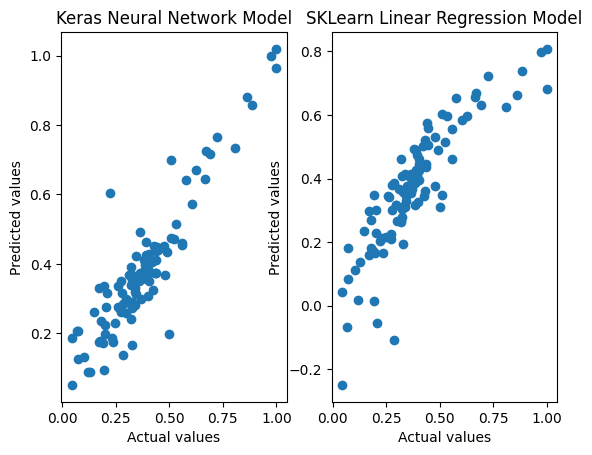

Linear Regression Model Mean Square Error
0.010305823300627579


In [22]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predKM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model Mean Square Error')
print(mse)

In [26]:
from sklearn.metrics import r2_score
print("Linear Regression R² Score:", r2_score(Y_test, Y_predLM))
print("Keras Neural Network R² Score:", r2_score(Y_test, Y_predKM))


Linear Regression R² Score: 0.7334492147453071
Keras Neural Network R² Score: 0.8348790130783154


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Calculate metrics
metrics = {
    "Model": ["Linear Regression", "Keras ANN"],
    "MAE": [
        mean_absolute_error(Y_test, Y_predLM),
        mean_absolute_error(Y_test, Y_predKM)
    ],
    "MSE": [
        mean_squared_error(Y_test, Y_predLM),
        mean_squared_error(Y_test, Y_predKM)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(Y_test, Y_predLM)),
        np.sqrt(mean_squared_error(Y_test, Y_predKM))
    ],
    "R² Score": [
        r2_score(Y_test, Y_predLM),
        r2_score(Y_test, Y_predKM)
    ]
}

# Create DataFrame
results_df = pd.DataFrame(metrics)

# Print the table
print("\n📊 Model Performance Comparison:")
print(results_df.to_string(index=False))



📊 Model Performance Comparison:
            Model      MAE      MSE     RMSE  R² Score
Linear Regression 0.071406 0.010306 0.101518  0.733449
        Keras ANN 0.054016 0.006384 0.079901  0.834879
